In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)


#Renaming the columns
df.columns = ["Comment_Text", "Label"]
df

,Comment_Text,Label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1
5,Democrats don't know how to manage money? Sh...,1
6,It's not like automation has eliminated the ne...,1
7,Would he win?,-1
8,Yeah I didn't get far. This article fills me ...,-1
9,Insane like a fox. Ted Cruz is actually very ...,1


In [3]:
print("This Irony dataset entails", len(df), "items")

This Irony dataset entails 1949 items


In [4]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [5]:
Ironic = []
Not_Ironic = []
for x in df["Label"]:
    if x == 1:
        Ironic.append(x)
    else:
        Not_Ironic.append(x)

print(f"The dataset enails a total of {len(Ironic)} IRONIC comments")
print(f"The dataset enails a total of {len(Not_Ironic)} NON-IRONIC comments")

The dataset enails a total of 537 IRONIC comments
The dataset enails a total of 1412 NON-IRONIC comments


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [8]:
#test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#split the training set to get validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=13)

#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print("The Train set entails:", len(train), "items") #70
print("The Test set entails:", len(test), "items")  #20
print("This Validation set entails:", len(val), "items")   #10



The Train set entails: 1364 items
The Test set entails: 390 items
This Validation set entails: 195 items


In [9]:
##Indexing Training - comment
"Comment_label:", train["Comment_Text"].iloc[:4]

('Comment_label:', 544     What makes you think Warren isn't Obama V 2. 0...
 1462    It surprises me that Republican congressmen us...
 976     His favorite color is Coca Cola, he clearly kn...
 372                                     That's hilarious.
 Name: Comment_Text, dtype: object)

In [10]:
##Indexing Training - label
"Label:", train["Label"].iloc[:4]

('Label:', 544    -1
 1462    1
 976    -1
 372    -1
 Name: Label, dtype: int64)

In [11]:
# pandas .shape to see data frame in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


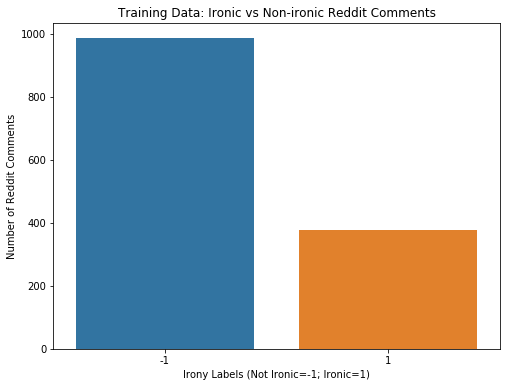

In [12]:
#Summarise the distribution of comments by different labels (1)Train, (2)Val (3)Test

#TRAINING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

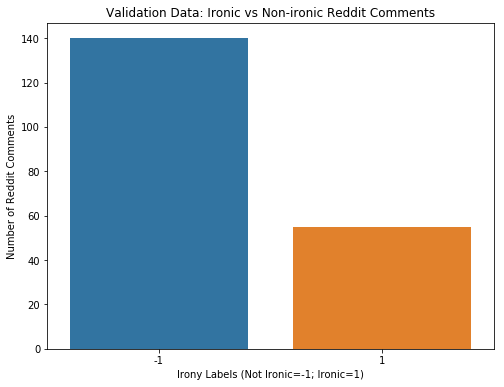

In [13]:
#VALIDATION
fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

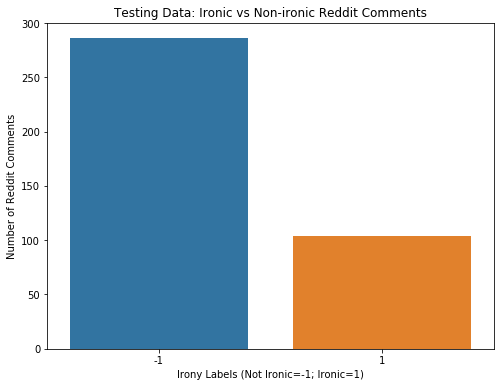

In [14]:
#TESTING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Not Ironic=-1; Ironic=1)")
plt.show()

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Changes made from here 18/01/2019

basically just overwrote the Comment_Text column rather than adding additional column for it to work better in a nested dictionary....

In [ ]:
# #split comments into tokens and OVERWITE additional column to dataframe
#APPLY SPACY NLP (make each a doc)

train["Comment_Text"] = train["Comment_Text"].apply(lambda x: nlp(x)) 

In [ ]:
train.head()

In [ ]:
print(train.index)

In [ ]:
#create a nested dict with index as outer key for entire train

train_dict = train.set_index(train.index).T.to_dict()
print(len(train_dict))
print(train_dict)

In [ ]:
#Split the training set into Ironic and Not ironic?? make 2 new dataframes?
ironic_df = train[train["Label"] >= 1]
notironic_df = train[train["Label"] <= -1]

In [ ]:
print(f"Training data contains {len(Ironic_df)} IRONIC comments")
print(f"Training data contains {len(Notironic_df)} NON- IRONIC comments")

In [ ]:
#create nested dicts for each ironic and not ironic split- with same labels
ironic_train_dict = ironic_df.set_index(ironic_df.index).T.to_dict()
notironic_train_dict = notironic_df.set_index(notironic_df.index).T.to_dict()